In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Dataset
df = pd.read_csv('second_hand_mobile_dat.csv')
df.head()

,Brand,Model,Original_Price,Age_Months,RAM_GB,Storage_GB,Battery_Health,Camera_MP,Screen_Size,Condition,5G_Support,Warranty_Remaining,Resale_Price
0,Vivo,Vivo Model 10,59750,7,3,512,71,16,6.2,Average,Yes,Yes,32751
1,Oppo,Oppo Model 27,17156,31,3,512,92,8,6.7,Excellent,Yes,Yes,11094
2,Oppo,Oppo Model 4,36977,6,12,64,83,32,5.5,Excellent,No,Yes,26761
3,Realme,Realme Model 24,20770,71,3,512,68,48,5.6,Average,No,No,3788
4,Motorola,Motorola Model 24,47291,32,4,64,70,48,5.7,Good,No,No,19669


In [2]:
df.isnull().sum()

,0
Brand,0
Model,0
Original_Price,0
Age_Months,0
RAM_GB,0
Storage_GB,0
Battery_Health,0
Camera_MP,0
Screen_Size,0
Condition,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               1100 non-null   object 
 1   Model               1100 non-null   object 
 2   Original_Price      1100 non-null   int64  
 3   Age_Months          1100 non-null   int64  
 4   RAM_GB              1100 non-null   int64  
 5   Storage_GB          1100 non-null   int64  
 6   Battery_Health      1100 non-null   int64  
 7   Camera_MP           1100 non-null   int64  
 8   Screen_Size         1100 non-null   float64
 9   Condition           1100 non-null   object 
 10  5G_Support          1100 non-null   object 
 11  Warranty_Remaining  1100 non-null   object 
 12  Resale_Price        1100 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 111.8+ KB


In [4]:
df.describe()

,Original_Price,Age_Months,RAM_GB,Storage_GB,Battery_Health,Camera_MP,Screen_Size,Resale_Price
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,63281.916364,37.049091,6.603636,187.781818,82.614545,39.687273,6.101636,30255.630909
std,32645.675076,21.302350,3.222869,172.581607,10.117893,32.495544,0.523303,21860.119982
min,8079.000000,1.000000,3.000000,32.000000,65.000000,8.000000,5.200000,2000.000000
25%,34951.750000,17.000000,4.000000,64.000000,74.000000,12.000000,5.600000,13371.500000
50%,61864.500000,37.000000,6.000000,128.000000,83.000000,32.000000,6.100000,24811.500000
75%,92103.000000,56.000000,8.000000,256.000000,91.000000,64.000000,6.600000,43631.250000
max,119961.000000,72.000000,12.000000,512.000000,100.000000,108.000000,7.000000,122956.000000


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# -----------------------------
# Load Dataset
# -----------------------------
df = pd.read_csv("second_hand_mobile_dat.csv")

# -----------------------------
# Encode Categorical Columns
# -----------------------------
label_encoder = LabelEncoder()

categorical_columns = [
    'Brand', 'Model', 'Condition',
    '5G_Support', 'Warranty_Remaining'
]

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# -----------------------------
# Define Features and Target
# -----------------------------
X = df.drop("Resale_Price", axis=1)
y = df["Resale_Price"]

# -----------------------------
# Feature Scaling (IMPORTANT for KNN)
# -----------------------------
scaler = StandardScaler()
X = scaler.fit_transform(X)

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# KNN Model
# -----------------------------
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train Model
knn_model.fit(X_train, y_train)

# -----------------------------
# Prediction
# -----------------------------
y_pred = knn_model.predict(X_test)

# -----------------------------
# Evaluation
# -----------------------------
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nKNN Performance:")
print(f"Accuracy (R2 %): {accuracy:.2f}%")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")



KNN Performance:
Accuracy (R2 %): 73.72%
Mean Absolute Error: 8557.27
Root Mean Squared Error: 11482.35


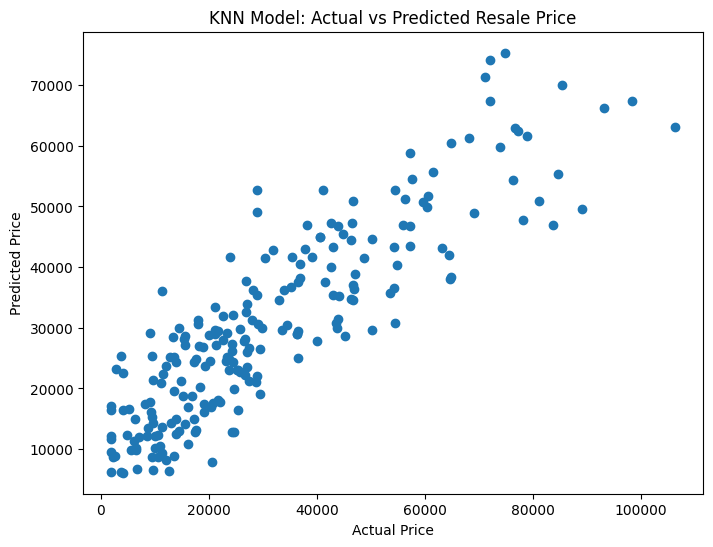

In [12]:
import matplotlib.pyplot as plt

# -----------------------------
# Graph: Actual vs Predicted
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNN Model: Actual vs Predicted Resale Price")

plt.show()


In [9]:
# -----------------------------
# Convert Categorical Columns
# -----------------------------
label_encoder = LabelEncoder()

categorical_columns = [
    'Brand', 'Model', 'Condition',
    '5G_Support', 'Warranty_Remaining'
]

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# -----------------------------
# Define Features and Target
# -----------------------------
X = df.drop("Resale_Price", axis=1)
y = df["Resale_Price"]

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Train Linear Regression Model
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------
# Prediction
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# Accuracy Checking
# -----------------------------
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nLinear Regression Performance:")
print(f"R2 Score:{r2:.2f}")
print(f"Mean Absolute Error:{mae:.2f}")
print(f"Root Mean Squared Error:{rmse:.2f}")



Linear Regression Performance:
R2 Score:0.82
Mean Absolute Error:7483.63
Root Mean Squared Error:9565.13


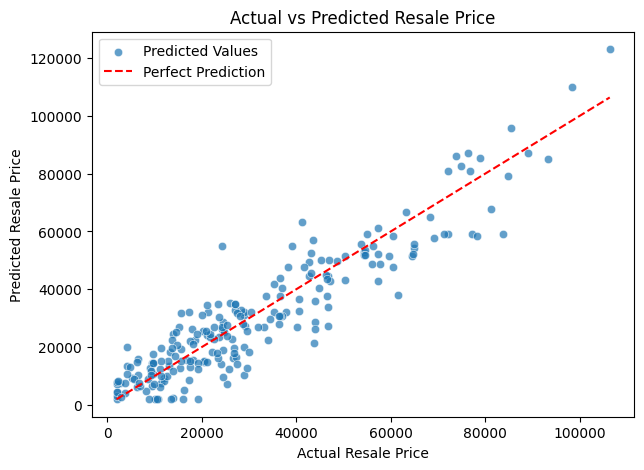

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))

# Scatter Plot
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, label="Predicted Values")

# Reference Line (Perfect Prediction Line)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', label="Perfect Prediction")

plt.xlabel("Actual Resale Price")
plt.ylabel("Predicted Resale Price")
plt.title("Actual vs Predicted Resale Price")

plt.legend()
plt.show()



In [13]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Dataset
df = pd.read_csv("second_hand_mobkcsv")

# -----------------------------
# Convert Categorical Columns
# -----------------------------
label_encoder = LabelEncoder()

categorical_columns = [
    'Brand', 'Model', 'Condition',
    '5G_Support', 'Warranty_Remaining'
]

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# -----------------------------
# Define Features and Target
# -----------------------------
X = df.drop("Resale_Price", axis=1)
y = df["Resale_Price"]

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Train Decision Tree Model
# -----------------------------
dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

# -----------------------------
# Prediction
# -----------------------------
y_pred = dt_model.predict(X_test)

# -----------------------------
# Accuracy Checking
# -----------------------------
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nDecision Tree Performance:")
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)



Decision Tree Performance:
R2 Score: 0.8482323320854792
Mean Absolute Error: 6905.777272727273
Root Mean Squared Error: 8725.316846812655


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# -----------------------------
# Scaling for KNN
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------
# Models (Random Forest Removed)
# -----------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

results = []

# -----------------------------
# Train & Evaluate Models
# -----------------------------
for name, model in models.items():

    if name == "KNN":
        model.fit(X_train_s, y_train_s)
        y_pred = model.predict(X_test_s)
        y_true = y_test_s
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_true = y_test

    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    results.append([name, r2, mae, rmse])

# -----------------------------
# Display Results
# -----------------------------
results_df = pd.DataFrame(results, columns=[
    "Model", "R2 Score", "MAE", "RMSE"
])

print("\nModel Comparison:")
print(results_df)



Model Comparison:
               Model  R2 Score          MAE          RMSE
0  Linear Regression  0.817611  7483.627478   9565.128524
1      Decision Tree  0.848232  6905.777273   8725.316847
2                KNN  0.737168  8557.269091  11482.348301


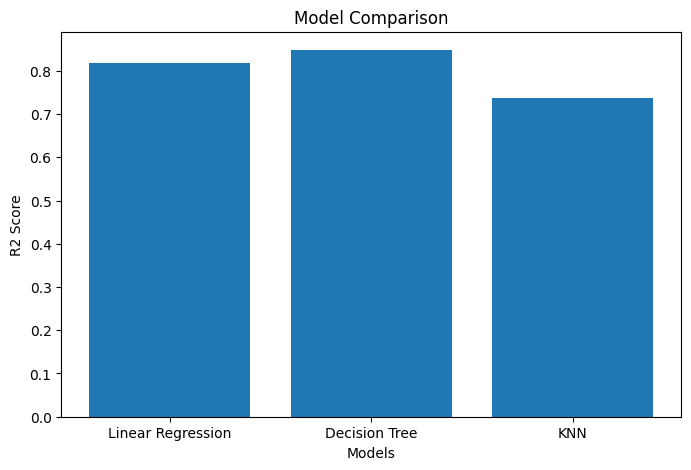

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["R2 Score"])

plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.title("Model Comparison")

plt.show()
